In [27]:
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [29]:
listaPaths = [r"NAO_IDENT_null_1988-2020_2006_2012_102142.csv", r"NAO_IDENT_null_1988-2020_1988_2005_102142.csv", r"NAO_IDENT_null_1988-2020_2013_2020_102142.csv"]
dataCombinada = pd.DataFrame()

In [30]:
for path in listaPaths:
    data = pd.read_csv(path, index_col = "Código do Paciente", sep=';')
    
    dataCombinada = pd.concat([dataCombinada, data], ignore_index=True)
    
dataCombinada.to_csv('dataSetFinal.csv', index=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9812\3237607474.py:2: DtypeWarning: Columns (3,6,7,8,9,10,13,14,23,24,25,27,28,29,30,31,32,33,34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path, index_col = "Código do Paciente", sep=';')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9812\3237607474.py:2: DtypeWarning: Columns (3,5,6,7,8,9,10,12,13,14,15,16,17,23,24,25,26,27,28,29,30,31,32,33,34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path, index_col = "Código do Paciente", sep=';')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9812\3237607474.py:2: DtypeWarning: Columns (3,6,7,8,9,10,25,27,28,29,30,31,32,36) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path, index_col = "Código do Paciente", sep=';')


In [31]:
dataCombinada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2273105 entries, 0 to 2273104
Data columns (total 37 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   Nome do RCBP                      object 
 1   Sexo                              object 
 2   Data de Nascimento                object 
 3   Idade                             float64
 4   Raca/Cor                          object 
 5   Nacionalidade                     object 
 6   Naturalidade Estado               object 
 7   Naturalidade                      object 
 8   Grau de Instrução                 object 
 9   Estado Civil                      object 
 10  Código Profissão                  float64
 11  Nome Profissão                    object 
 12  Estado Endereço                   object 
 13  Cidade Endereço                   object 
 14  Descrição da Topografia           object 
 15  Código da Topografia              object 
 16  Descrição da Morfologia           ob

In [32]:
dataCombinada.shape #checando o tamanho do dataset

(2273105, 37)

In [33]:
contador = 0

for column in dataCombinada.columns: #relatorio da quantidade de valores não nulos em colunas cujo o percentual de valores nulos é acima de 50%
    if dataCombinada[column].isnull().mean()*100 > 50:
        nullPercentual = dataCombinada[column].isnull().mean() * 100
        qtdNaoNull = dataCombinada[column].count()
        print(f"Coluna: {column}\nPercentual de valores nulos: {nullPercentual:.1f}%\nQuantidade de valores não nulos: {qtdNaoNull}")
        print("==================================================")
        contador += 1

print(f"Número total de colunas nessa situação: {contador}")
        


Coluna: Naturalidade
Percentual de valores nulos: 69.8%
Quantidade de valores não nulos: 685899
Coluna: Descrição da Doenca Infantil
Percentual de valores nulos: 64.1%
Quantidade de valores não nulos: 815188
Coluna: Código da Doenca Infantil
Percentual de valores nulos: 64.1%
Quantidade de valores não nulos: 815188
Coluna: Descrição da Doenca Adulto Jovem
Percentual de valores nulos: 64.9%
Quantidade de valores não nulos: 797256
Coluna: Código da Doenca Adulto Jovem
Percentual de valores nulos: 64.9%
Quantidade de valores não nulos: 797256
Coluna: Lateralidade
Percentual de valores nulos: 83.5%
Quantidade de valores não nulos: 374222
Coluna: Estadiamento
Percentual de valores nulos: 83.7%
Quantidade de valores não nulos: 371590
Coluna: TNM
Percentual de valores nulos: 83.6%
Quantidade de valores não nulos: 371657
Coluna: Status Vital
Percentual de valores nulos: 84.6%
Quantidade de valores não nulos: 350147
Coluna: Tipo do Obito
Percentual de valores nulos: 74.8%
Quantidade de valores 

In [34]:
dataCombinada['TNM'].unique()

array([nan, 999.0, '999', ..., 'TIBNIAM0', 'T4AN1CM1B', 'T3AN1AM0'],
      dtype=object)

In [35]:
for column in dataCombinada.columns:
    print(f"Valores únicos em {column}: {dataCombinada[column].unique()}\n")
    print("=============================================================")

Valores únicos em Nome do RCBP: ['RCBP GOIÂNIA' 'RCBP SÃO PAULO' 'RCBP FLORIANOPOLIS' 'RCBP ACRE'
 'RCBP TERESINA' 'RCBP ALAGOAS' 'RCBP SANTOS' 'RCBP ANGRA DOS REIS'
 'RCBP RORAIMA' 'RCBP RECIFE' 'RCBP ARACAJU' 'RCBP BELÉM'
 'RCBP PORTO ALEGRE' 'RCBP POÇOS DE CALDAS' 'RCBP BELO HORIZONTE'
 'RCBP PALMAS' 'RCBP CAMPINAS-SMS' 'RCBP CAMPO GRANDE' 'RCBP NATAL'
 'RCBP MATO GROSSO (INTERIOR)' 'RCBP CUIABA' 'RCBP MANAUS' 'RCBP CURITIBA'
 'RCBP JOAO PESSOA' 'RCBP JAHU' 'RCBP DISTRITO FEDERAL' 'RCBP FORTALEZA'
 'RCBP DRS BARRETOS' 'RCBP ESPÍRITO SANTO' 'RCBP CAMPINAS-UNICAMP'
 'RCBP SALVADOR' 'RCBP AMAPÁ' 'RCBP RONDONIA']

Valores únicos em Sexo: ['FEMININO' 'MASCULINO' 'IGNORADO']

Valores únicos em Data de Nascimento: ['11/03/1943' '10/04/1966' '05/05/1924' ... '03/01/2012' '02/08/2014'
 '31/08/1997']

Valores únicos em Idade: [ 68.  46.  88.  65.  63.  66.  83.  62.  70.  85.  43.  61.  57.  64.
  59.  72.  73.  34.  44.  75.  50.  77.  54.  71.  69.  74.  67.  78.
  95.  82.  53.  27.  56.  

In [36]:
#Convertendo pra formato data
dataCombinada['Data de Nascimento'] = pd.to_datetime(dataCombinada['Data de Nascimento'], errors='coerce')
dataCombinada['Data do Óbito'] = pd.to_datetime(dataCombinada['Data de Nascimento'], errors='coerce')
dataCombinada['Data de Último Contato'] = pd.to_datetime(dataCombinada['Data de Nascimento'], errors='coerce')
dataCombinada['Data de Diagnostico'] = pd.to_datetime(dataCombinada['Data de Nascimento'], errors='coerce')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9812\230015479.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dataCombinada['Data de Nascimento'] = pd.to_datetime(dataCombinada['Data de Nascimento'], errors='coerce')


In [37]:
#Convertendo os valores que são números pra de fato tipo de dado númerico
dataCombinada['Idade'] = pd.to_numeric(dataCombinada['Idade'], errors='coerce').astype('Int64')
dataCombinada['Código Profissão'] = pd.to_numeric(dataCombinada['Código Profissão'], errors='coerce').astype('Int64')
dataCombinada['Código da Morfologia'] = pd.to_numeric(dataCombinada['Código da Morfologia'], errors='coerce').astype('Int64')


In [38]:
#Checando a moda
print(f"Moda RCBP: {dataCombinada['Nome do RCBP'].mode().iloc[0]}")
print(f"Moda do sexo dos pacientes: {dataCombinada['Sexo'].mode().iloc[0]}")
print(f"Moda doenças: {dataCombinada['Descrição da Doenca'].mode().iloc[0]}")
print(f"Média de idade dos pacientes: {round(dataCombinada['Idade'].mean(), 2)}")
print(f"Moda dos Códigos de Morfologia: {dataCombinada['Código da Morfologia'].mode().iloc[0]}")


Moda RCBP: RCBP SÃO PAULO
Moda do sexo dos pacientes: FEMININO
Moda doenças: PROSTATA
Média de idade dos pacientes: 60.11
Moda dos Códigos de Morfologia: 81403


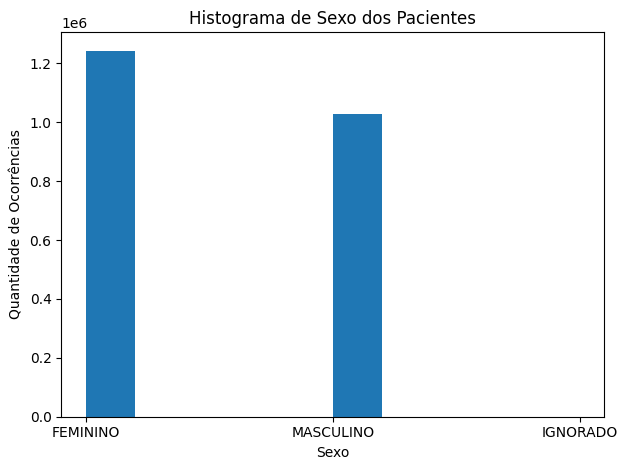

In [39]:
fig, ax = plt.subplots()

ax.hist('Sexo', data=dataCombinada)
ax.set_title("Histograma de Sexo dos Pacientes")
ax.set_ylabel("Quantidade de Ocorrências")
ax.set_xlabel("Sexo")

plt.tight_layout()

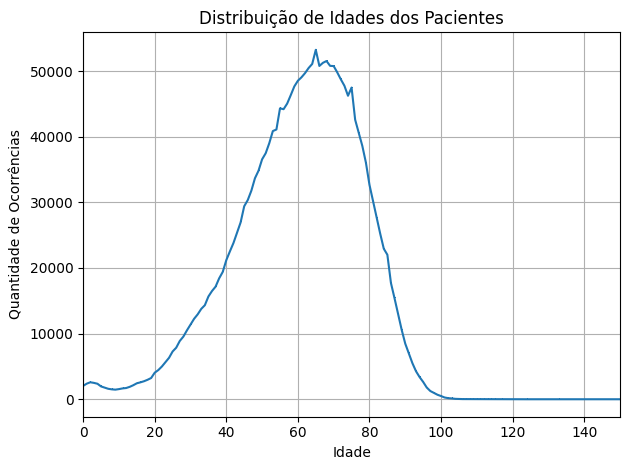

In [40]:
contagem_idades = dataCombinada['Idade'].value_counts().sort_index()

plt.plot(contagem_idades.index, contagem_idades.values, marker=',', linestyle='-')
plt.xlim(0, 150)

plt.title("Distribuição de Idades dos Pacientes")
plt.ylabel("Quantidade de Ocorrências")
plt.xlabel("Idade")

plt.grid(True)
plt.tight_layout()

plt.show()

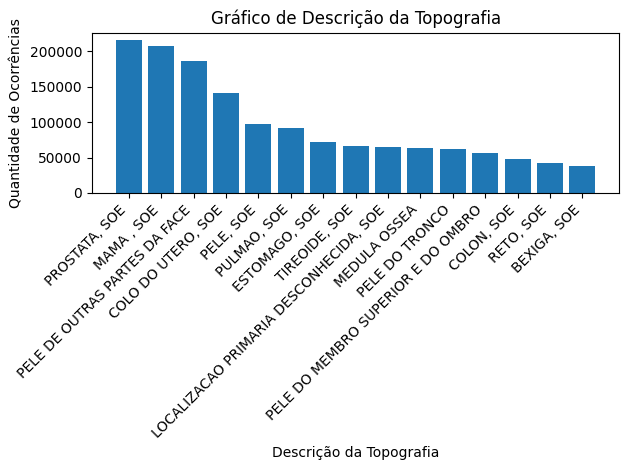

In [41]:
contagem_descricao_topografia = dataCombinada['Descrição da Topografia'].value_counts()

fig, ax = plt.subplots()

ax.bar(contagem_descricao_topografia.head(15).index, contagem_descricao_topografia.head(15).values)
ax.set_title("Gráfico de Descrição da Topografia")
ax.set_ylabel("Quantidade de Ocorrências")
ax.set_xlabel("Descrição da Topografia")

ax.set_xticks(range(len(contagem_descricao_topografia.head(15).index)))
ax.set_xticklabels(contagem_descricao_topografia.head(15).index, rotation=45, ha='right')

plt.tight_layout()

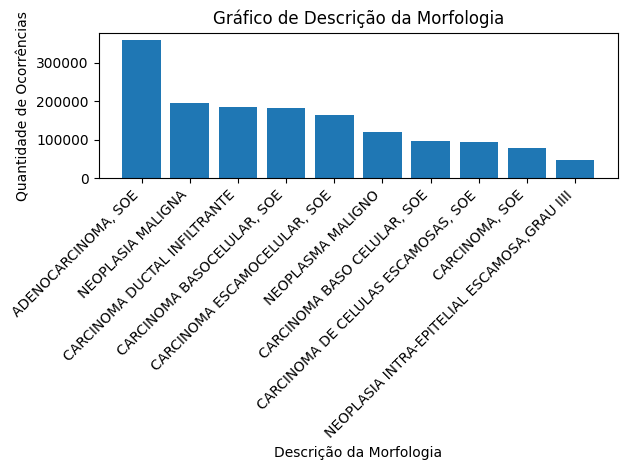

In [42]:
contagem_descricao_morfologia = dataCombinada['Descrição da Morfologia'].value_counts()

fig, ax = plt.subplots()

ax.bar(contagem_descricao_morfologia.head(10).index, contagem_descricao_morfologia.head(10).values)
ax.set_title("Gráfico de Descrição da Morfologia")
ax.set_ylabel("Quantidade de Ocorrências")
ax.set_xlabel("Descrição da Morfologia")

ax.set_xticks(range(len(contagem_descricao_morfologia.head(10).index)))
ax.set_xticklabels(contagem_descricao_morfologia.head(10).index, rotation=45, ha='right')

plt.tight_layout()

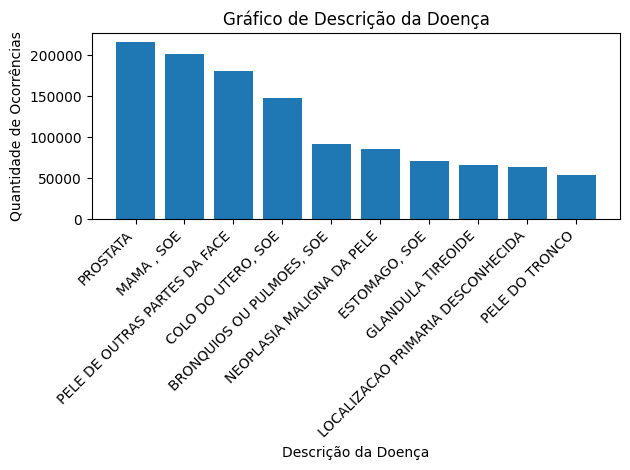

In [43]:
contagem_descricao_doenca = dataCombinada['Descrição da Doenca'].value_counts()

fig, ax = plt.subplots()

ax.bar(contagem_descricao_doenca.head(10).index, contagem_descricao_doenca.head(10).values)
ax.set_title("Gráfico de Descrição da Doença")
ax.set_ylabel("Quantidade de Ocorrências")
ax.set_xlabel("Descrição da Doença")

ax.set_xticks(range(len(contagem_descricao_doenca.head(10).index)))
ax.set_xticklabels(contagem_descricao_doenca.head(10).index, rotation=45, ha='right')

plt.tight_layout()

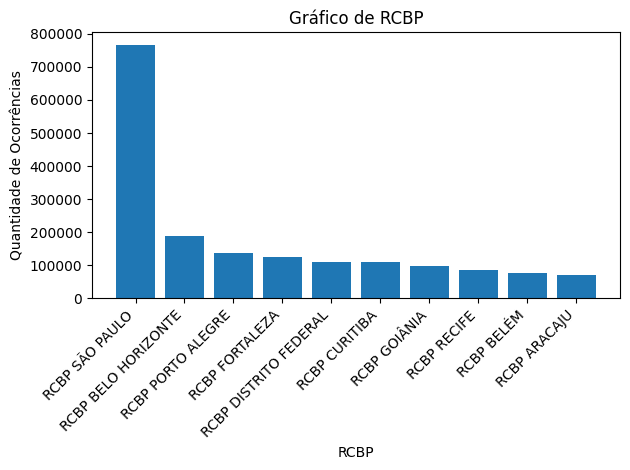

In [44]:
contagem_rcbp = dataCombinada['Nome do RCBP'].value_counts()

fig, ax = plt.subplots()

ax.bar(contagem_rcbp.head(10).index, contagem_rcbp.head(10).values)
ax.set_title("Gráfico de RCBP")
ax.set_ylabel("Quantidade de Ocorrências")
ax.set_xlabel("RCBP")

ax.set_xticks(range(len(contagem_rcbp.head(10).index)))
ax.set_xticklabels(contagem_rcbp.head(10).index, rotation=45, ha='right')

plt.tight_layout()

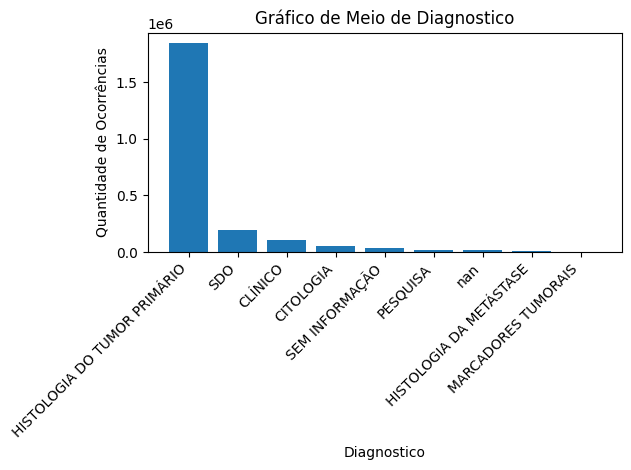

In [45]:
contagem_diagnostico = dataCombinada['Meio de Diagnostico'].astype(str).value_counts()

fig, ax = plt.subplots()

ax.bar(contagem_diagnostico.index, contagem_diagnostico.values)
ax.set_title("Gráfico de Meio de Diagnostico")
ax.set_ylabel("Quantidade de Ocorrências")
ax.set_xlabel("Diagnostico")

ax.set_xticks(range(len(contagem_diagnostico.index)))
ax.set_xticklabels(contagem_diagnostico.index, rotation=45, ha='right')

plt.tight_layout()

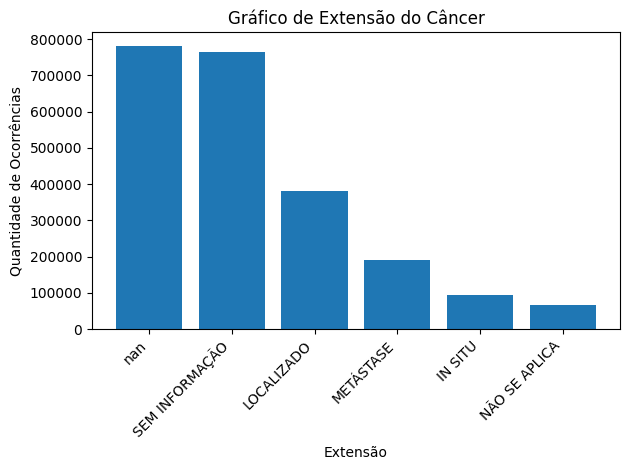

In [46]:
contagem_extensao = dataCombinada['Extensão'].astype(str).value_counts()

fig, ax = plt.subplots()

ax.bar(contagem_extensao.index, contagem_extensao.values)
ax.set_title("Gráfico de Extensão do Câncer")
ax.set_ylabel("Quantidade de Ocorrências")
ax.set_xlabel("Extensão")

ax.set_xticks(range(len(contagem_extensao.index)))
ax.set_xticklabels(contagem_extensao.index, rotation=45, ha='right')

plt.tight_layout()

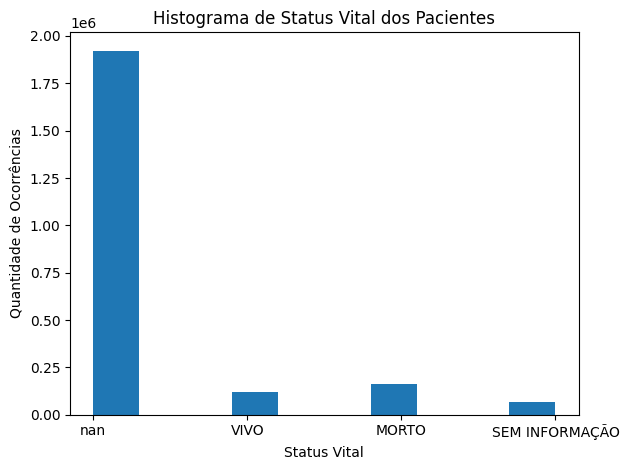

In [47]:
dataCombinada['Status Vital'] = dataCombinada['Status Vital'].astype(str)

fig, ax = plt.subplots()

ax.hist('Status Vital', data=dataCombinada)
ax.set_title("Histograma de Status Vital dos Pacientes")
ax.set_ylabel("Quantidade de Ocorrências")
ax.set_xlabel("Status Vital")

plt.tight_layout()

In [55]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [49]:
for column in dataCombinada.columns:
    print(f"Coluna {column}: {dataCombinada[column].apply(type).unique()}")

Coluna Nome do RCBP: [<class 'str'>]
Coluna Sexo: [<class 'str'>]
Coluna Data de Nascimento: [<class 'pandas._libs.tslibs.timestamps.Timestamp'>
 <class 'pandas._libs.tslibs.nattype.NaTType'>]
Coluna Idade: [<class 'int'> <class 'pandas._libs.missing.NAType'>]
Coluna Raca/Cor: [<class 'str'> <class 'float'>]
Coluna Nacionalidade: [<class 'float'> <class 'str'>]
Coluna Naturalidade Estado: [<class 'float'> <class 'str'>]
Coluna Naturalidade: [<class 'float'> <class 'str'>]
Coluna Grau de Instrução: [<class 'str'> <class 'float'>]
Coluna Estado Civil: [<class 'str'> <class 'float'>]
Coluna Código Profissão: [<class 'int'> <class 'pandas._libs.missing.NAType'>]
Coluna Nome Profissão: [<class 'str'> <class 'float'>]
Coluna Estado Endereço: [<class 'str'> <class 'float'>]
Coluna Cidade Endereço: [<class 'str'> <class 'float'>]
Coluna Descrição da Topografia: [<class 'str'> <class 'float'>]
Coluna Código da Topografia: [<class 'str'> <class 'float'>]
Coluna Descrição da Morfologia: [<class '

In [50]:
dataCombinada['Raca/Cor'] = dataCombinada['Raca/Cor'].astype('str')
dataCombinada['Nacionalidade'] = dataCombinada['Nacionalidade'].astype('str')
dataCombinada['Naturalidade Estado'] = dataCombinada['Naturalidade Estado'].astype('str')
dataCombinada['Naturalidade'] = dataCombinada['Naturalidade'].astype('str')
dataCombinada['Grau de Instrução'] = dataCombinada['Grau de Instrução'].astype('str')
dataCombinada['Estado Civil'] = dataCombinada['Estado Civil'].astype('str')
dataCombinada['Nome Profissão'] = dataCombinada['Nome Profissão'].astype('str')
dataCombinada['Estado Endereço'] = dataCombinada['Estado Endereço'].astype('str')
dataCombinada['Cidade Endereço'] = dataCombinada['Cidade Endereço'].astype('str')
dataCombinada['Descrição da Topografia'] = dataCombinada['Descrição da Topografia'].astype('str')
dataCombinada['Código da Topografia'] = dataCombinada['Código da Topografia'].astype('str')
dataCombinada['Descrição da Morfologia'] = dataCombinada['Descrição da Morfologia'].astype('str')
dataCombinada['Descrição da Doenca Infantil'] = dataCombinada['Descrição da Doenca Infantil'].astype('str')
dataCombinada['Código da Doenca Infantil'] = dataCombinada['Código da Doenca Infantil'].astype('str')
dataCombinada['Descrição da Doenca Adulto Jovem'] = dataCombinada['Descrição da Doenca Adulto Jovem'].astype('str')
dataCombinada['Código da Doenca Adulto Jovem'] = dataCombinada['Código da Doenca Adulto Jovem'].astype('str')
dataCombinada['Indicador de Caso Raro'] = dataCombinada['Indicador de Caso Raro'].astype('str')
dataCombinada['Meio de Diagnostico'] = dataCombinada['Meio de Diagnostico'].astype('str')
dataCombinada['Extensão'] = dataCombinada['Extensão'].astype('str')
dataCombinada['Lateralidade'] = dataCombinada['Lateralidade'].astype('str')
dataCombinada['Estadiamento'] = dataCombinada['Estadiamento'].astype('str')
dataCombinada['TNM'] = dataCombinada['TNM'].astype('str')
dataCombinada['Tipo do Obito'] = dataCombinada['Tipo do Obito'].astype('str')
dataCombinada['Metástase à distância'] = dataCombinada['Metástase à distância'].astype('str')

In [51]:
dataCombinada.drop('Metástase à distância', axis=1, inplace=True)
dataCombinada.drop('Unnamed: 37', axis=1, inplace=True)

In [52]:
for column in dataCombinada.columns:
    if dataCombinada[column].dtype == "object":
        dataCombinada[column] = LabelEncoder().fit_transform(dataCombinada[column])

In [54]:
dataCombinada.corr()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9812\3332775189.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataCombinada.corr()


,Nome do RCBP,Sexo,Idade,Raca/Cor,Nacionalidade,Naturalidade Estado,Naturalidade,Grau de Instrução,Estado Civil,Código Profissão,Nome Profissão,Estado Endereço,Cidade Endereço,Descrição da Topografia,Código da Topografia,Descrição da Morfologia,Código da Morfologia,Descrição da Doenca,Código da Doenca,Descrição da Doenca Infantil,Código da Doenca Infantil,Descrição da Doenca Adulto Jovem,Código da Doenca Adulto Jovem,Indicador de Caso Raro,Meio de Diagnostico,Extensão,Lateralidade,Estadiamento,TNM,Status Vital,Tipo do Obito
Nome do RCBP,1.000000,0.002851,-0.011483,0.134536,0.701247,0.623605,0.469364,0.621721,0.637984,-0.276177,-0.089444,0.515357,0.853279,0.010909,0.034429,-0.022552,0.022167,-0.011423,-0.012578,-0.665605,-0.293237,-0.674666,-0.566443,0.726958,-0.153954,0.469710,0.458280,0.472192,0.465190,0.384414,0.298226
Sexo,0.002851,1.000000,0.125404,-0.029271,0.004150,0.012895,0.010582,-0.005438,-0.050575,0.135487,-0.056967,0.014567,0.003912,0.125902,-0.074268,-0.060707,-0.024091,0.142444,-0.144182,0.000419,-0.029189,0.010658,-0.008914,0.007454,0.048112,0.065406,0.002864,-0.012842,-0.017904,-0.029104,-0.062703
Idade,-0.011483,0.125404,1.000000,-0.105738,-0.016886,0.013904,-0.004588,-0.038703,0.023484,-0.013666,-0.023942,0.032317,-0.013888,0.108108,-0.110990,-0.134615,-0.227490,0.142456,-0.220723,0.074043,0.249421,0.044763,0.120447,-0.016836,0.111224,0.063592,-0.058870,-0.075555,-0.082623,-0.084769,-0.118260
Raca/Cor,0.134536,-0.029271,-0.105738,1.000000,0.259266,0.142976,0.102435,0.271086,0.178044,-0.217846,0.036367,0.104288,0.173006,0.049555,0.071971,-0.029975,-0.015279,0.036968,0.071964,-0.185184,-0.050967,-0.156905,-0.097682,0.239429,-0.047877,0.095142,0.161595,0.167681,0.172117,0.163486,0.251678
Nacionalidade,0.701247,0.004150,-0.016886,0.259266,1.000000,0.757124,0.450966,0.812793,0.768546,-0.378005,-0.133039,0.654378,0.729403,0.048111,0.069516,-0.047249,0.019935,0.025223,-0.001560,-0.710366,-0.308941,-0.715439,-0.595883,0.873511,-0.129920,0.475199,0.391768,0.415902,0.416012,0.376493,0.432223
Naturalidade Estado,0.623605,0.012895,0.013904,0.142976,0.757124,1.000000,0.350537,0.720378,0.757035,-0.320843,-0.144238,0.785232,0.639859,0.063922,0.066616,-0.060358,0.019572,0.044807,-0.015599,-0.691058,-0.293966,-0.695705,-0.577521,0.854194,-0.142528,0.453654,0.228219,0.255754,0.247671,0.261316,0.383963
Naturalidade,0.469364,0.010582,-0.004588,0.102435,0.450966,0.350537,1.000000,0.395671,0.419659,-0.101850,-0.074395,0.232658,0.475208,-0.027254,-0.022669,0.081673,0.025979,-0.055516,-0.035624,-0.375145,-0.172039,-0.375523,-0.317082,0.456038,0.066523,0.326376,0.384248,0.333162,0.332722,0.184878,0.056309
Grau de Instrução,0.621721,-0.005438,-0.038703,0.271086,0.812793,0.720378,0.395671,1.000000,0.711584,-0.431001,-0.155094,0.600134,0.651084,0.056137,0.073962,-0.059096,0.020689,0.031810,0.020294,-0.662932,-0.286800,-0.672242,-0.561104,0.820109,-0.158777,0.462498,0.345447,0.363472,0.363159,0.372693,0.462387
Estado Civil,0.637984,-0.050575,0.023484,0.178044,0.768546,0.757035,0.419659,0.711584,1.000000,-0.324746,-0.111315,0.637842,0.673594,0.030090,0.076876,-0.010711,0.030035,0.007813,-0.011907,-0.693655,-0.310740,-0.697239,-0.585646,0.852520,-0.120848,0.520936,0.273143,0.280373,0.278864,0.233902,0.320989
Código Profissão,-0.276177,0.135487,-0.013666,-0.217846,-0.378005,-0.320843,-0.101850,-0.431001,-0.324746,1.000000,0.186950,-0.287883,-0.288282,-0.044329,-0.080997,0.040395,-0.007057,-0.043994,-0.065935,0.321166,0.163043,0.313615,0.261840,-0.376643,0.112279,-0.182046,-0.132163,-0.149371,-0.155169,-0.204243,-0.345575


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9812\4152557857.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataCombinada.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)


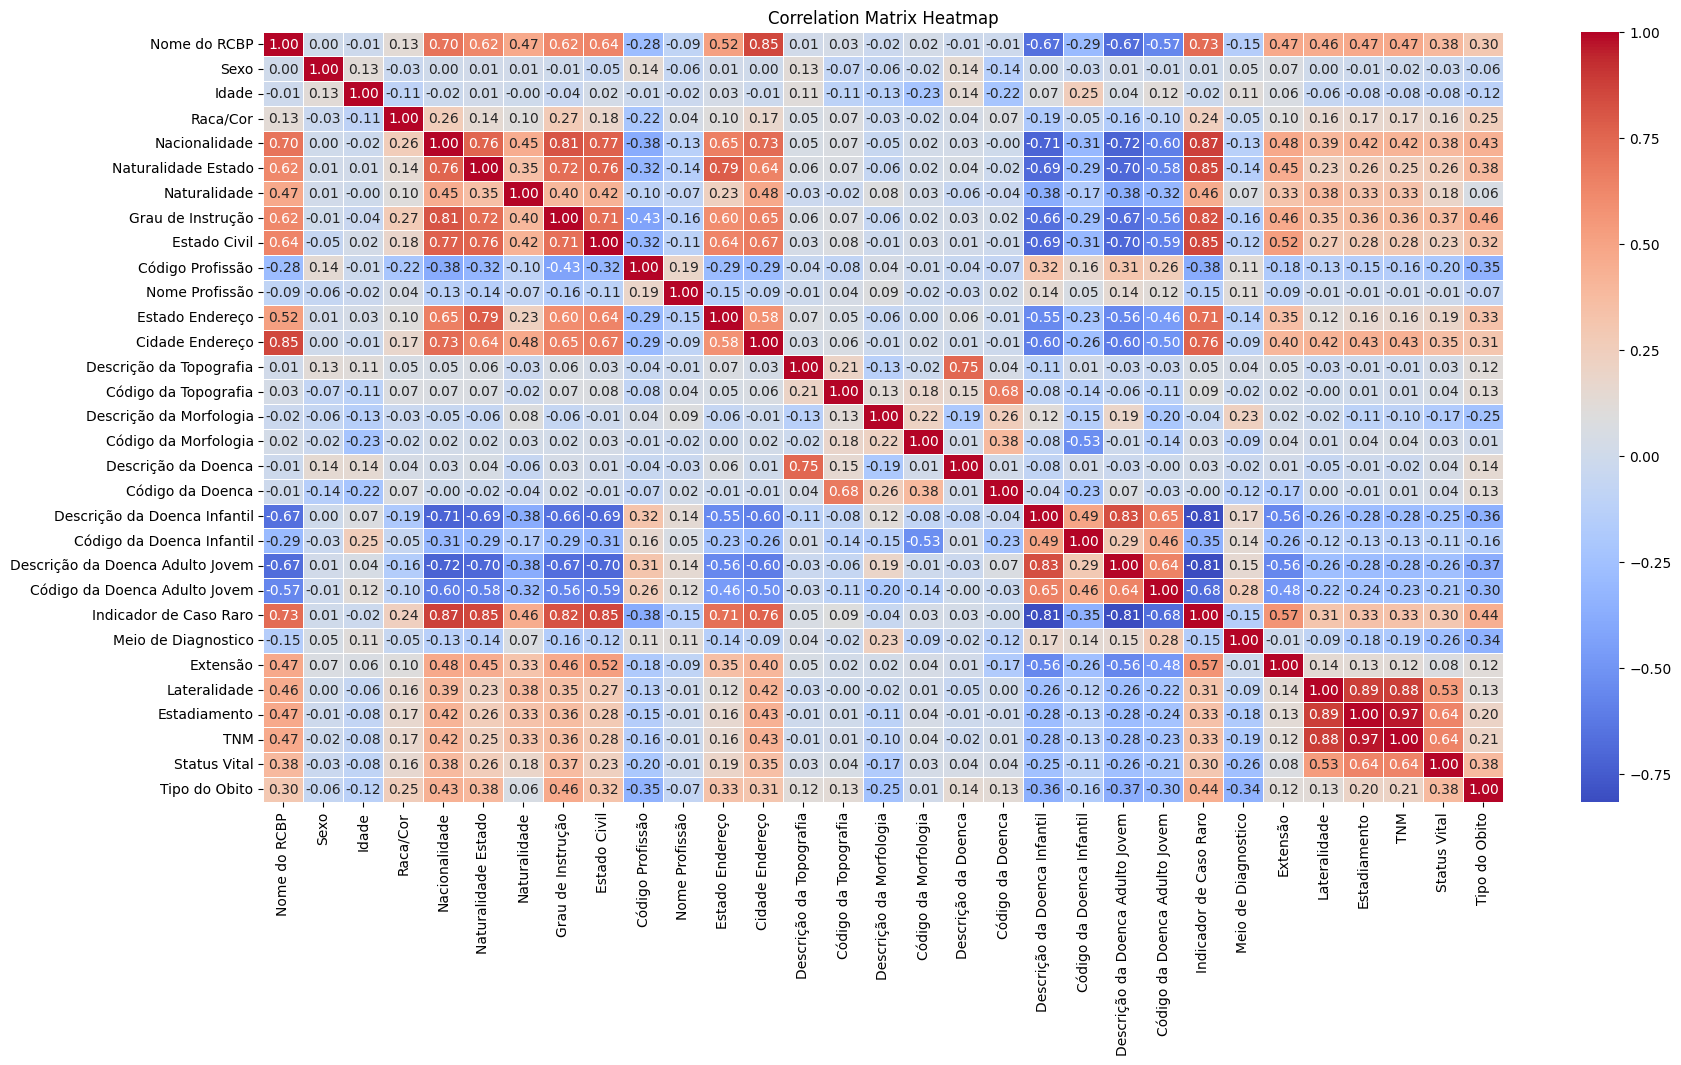

In [58]:
plt.figure(figsize=(20, 10))
sns.heatmap(dataCombinada.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()